# Feature Matching:

Template Matching is a technique where a smaller image (template) is slid over a larger image to find the region that best matches the template. It compares pixel intensities, so it's effective for finding exact matches but struggles with scale, rotation, or lighting changes.

Feature matching extracts defining key features from an input image(using ideas from corner detection,edge detection,and contour detection.) Then using a distance calculations, finds all the matches in secondary image. This means we are no longer required to have an exact copy of the target image.

We will Learn 3 methods for the feature matching:

1. Brute Force Matching with ORB Descriptors.
2. Brute Force Matching with SIFT Descriptors and Ratio Test
3. FLANN based Matcher


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def display(img,cmap = 'gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = 'gray')

In [23]:
reeses = cv2.imread(r"C:\Users\JERRY\Downloads\Computer-Vision-with-Python\Computer-Vision-with-Python\DATA\reeses_puffs.png",0)


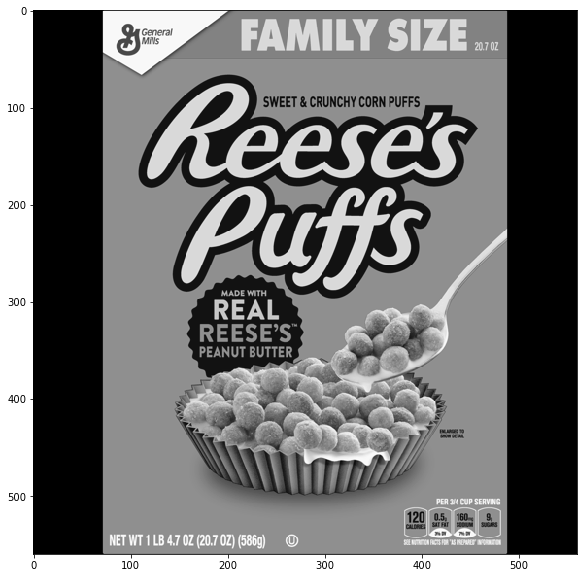

In [24]:
display(reeses)

So this is the image that we are gonna be asking where it is in the secondary image. notice that this is actually not a photo of th reeses puff packet. its actually jsut a print out of resses puff's packet looks.

This is the best part about this Feature matching , that we dont need to have a exact photo to loo for the photo in a main image.

In [25]:
cereals = cv2.imread(r"C:/Users/JERRY/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/many_cereals.jpg",0)

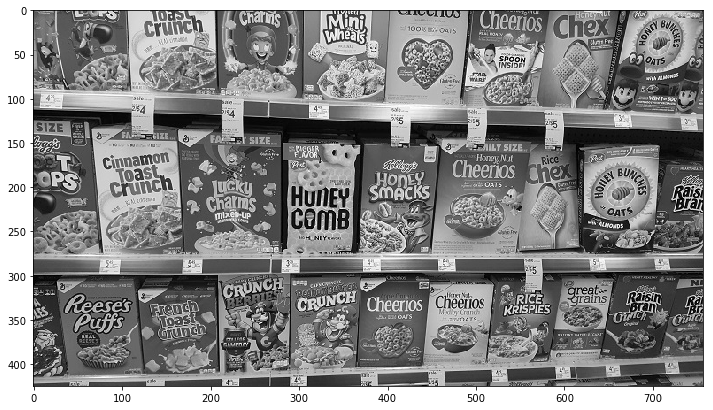

In [26]:
display(cereals)

Notice , this is the image where we would look for the target image. Notice that not every packet is angled exactly towards the camera, and at the bottom left corner, we can find the main image (reeses puffs).

We should also notice that this is not the exact same cereal box(in main image) which we have in target image.  Target image has Family size labeled on it and the other one is just a normal size packet. however some other brands do have this family sized labeled on them which might can affect the results.

# Brute force Matching with ORB Descriptors

So the first thing we do, we create the detector,

In [27]:
orb = cv2.ORB_create()    #so this our detector object.

now we find a keypoint and descriptors off of this object.
    we would do this by running detector object on both the target image(reeses) and main image(cereals).

In [28]:
#detectAndCompute(image, mask[, descriptors[, useProvidedKeypoints]]) -> keypoints, descriptors

kp1,des1 = orb.detectAndCompute(reeses,None)   # Tuple unpacking
kp2,des2 = orb.detectAndCompute(cereals,None) 

Now we would find the matching object. ( Brute Force matching Object)

In [29]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)   # consider it as default parameters here.

NOw we can actually check where the matches occur...

In [30]:
matches  = bf.match(des1,des2)    # des1,des2  = descriptor of set 1 and set 2 respectively

In [31]:
# Now we are going to sort them in order of their distance.

In [32]:
# matches   # these are the bunch of speciallized matched objects.

If we check single match...

single_match = matches[0]
single_match.distance    # this disatnce clarify how good the match is... less distance it has=== better match and vice versa

In [33]:
len(matches)

263

In [34]:
#sorted(iterable, /, *, key=None, reverse=False)

matches = sorted(matches,key=lambda x:x.distance)  # we are sorting the matches by distance using lambda,can also be done using for loop


In [35]:
#drawMatches(img1, keypoints1, img2, keypoints2, matches1to2, outImg[, matchColor[, singlePointColor[, matchesMask[, flags]]]]) -> outImg
#We can provide all the matches but since its too many...

reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags = 2)

so whats really nice about this function is it automatically sticks together both target and main image, and its going to draw line where it thinks it found a perfect matches..  according to this method, (unfortunately this is not that accurate as such.)

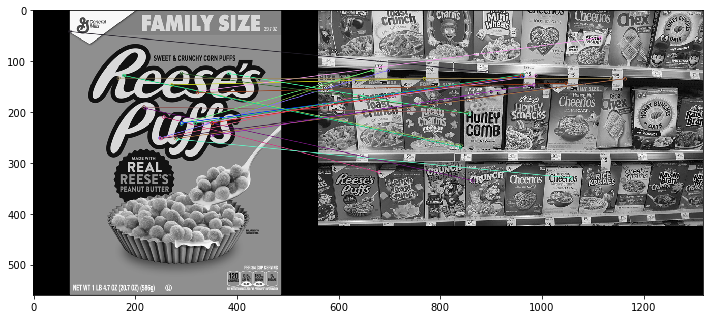

In [36]:
display(reeses_matches)

So we can see first 25 matches that it found.. which are not even close

Note: This Brute Force ORB detection does not always work espeecially when your target image does not really look like the main image...  :( 

# Brute force Matching with SIFT Descriptors:

Scale invarient feature transform, this works well, when we have image of different size and scale.

In [37]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)


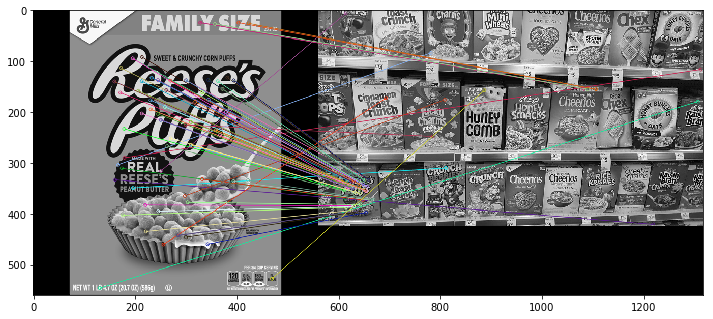

In [38]:
display(sift_matches)

In [39]:
matchesMask = [[0,0] for i in range(len(matches))] 

# matchesMask is basically a bunch of[0,0]'s

In [40]:
# Apply ratio test

for i, (match1,match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1,0]  # this would replace [0,0] with [1,0] depending up on a good match.
      

 # now we are going to use this maskMatch as a drawing parameter dicionary

In [41]:
draw_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchesMask,
                  flags = 0)

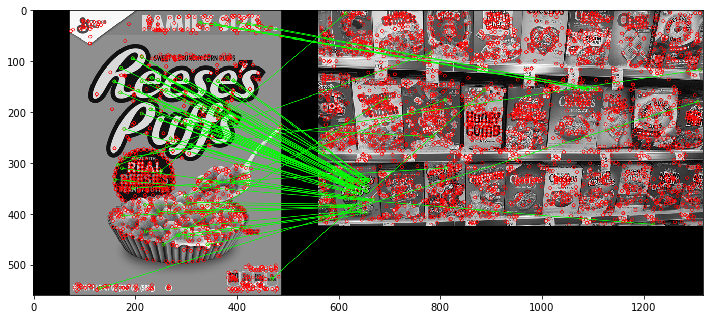

In [42]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)

In [43]:
len(good)    # sorted out close to perfect feature matches

78

In [44]:
len(matches)   # Total matches

1500

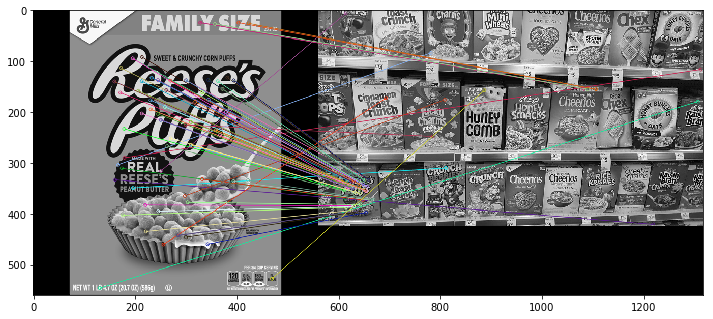

In [45]:
display(sift_matches)

# FLANN based Matcher

In [46]:
sift = cv2.xfeatures2d.SIFT_create()

In [47]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [48]:
# FLANN : Fast library for approximate nearest neighbours

# its much faster than the Brute Force methods, however its not gonna find best possible matches,it jsut finds general
# good matches.

We can play with FLANN parameters in order to increase the precison or quality of matches but that comes with a cost of slowing down the algorithm.

In [49]:
# default parameters:    # we can play around with the parameters but more we mess around, process becomes slow
                        # default params are set to the optimum possible speed of the process (FYI)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE,trees = 5 )
search_params = dict(checks = 50),{'checks':50}

In [50]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

Now we can actually grab the k nearest matches using this flann object.

In [51]:
matches = flann.knnMatch(des1,des2,k=2)

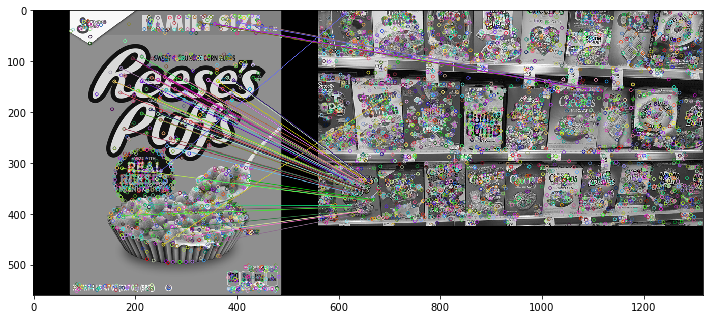

In [52]:
# similar ratio test as previous method:

good = []
for match1,match2 in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags = 0)   # we can take flags 0,2 etc... 
display(flann_matches)

Notice: we are getting similar results as we got with the SIFT method.  for larger iamges, FLANN matches is better than brute force matches

## One thing that we can do is, we can Draw the matching feature line in a different color and other similar few matches lines in a different color.

So that we can actually see the potential features to match on, but only see the connection with which we are concerned with.

we can do this by simply adding a mask.


in between two cells : matches and ratio test(good[])   --- we are adding matchesMask